In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/kaylar/Downloads/Heart_disease_cleveland_new.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [3]:
df.shape
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df['sex'].value_counts() # more males with chest pain than females 

sex
1    206
0     97
Name: count, dtype: int64

In [5]:
df['cp'].value_counts() # more people with asymptomatic chest pain 

cp
3    144
2     86
1     50
0     23
Name: count, dtype: int64

In [6]:
df['thal'].value_counts() # only a small amount of people have a fixed defect 

thal
1    168
3    117
2     18
Name: count, dtype: int64

In [7]:
df['trestbps'].value_counts() # max is 200 (2), min is 94 (1)

trestbps
120    37
130    36
140    32
110    19
150    17
138    12
128    12
160    11
125    11
112     9
132     8
118     7
124     6
108     6
135     6
152     5
134     5
145     5
100     4
170     4
122     4
126     3
136     3
115     3
180     3
142     3
105     3
102     2
146     2
144     2
148     2
178     2
94      2
165     1
123     1
114     1
154     1
156     1
106     1
155     1
172     1
200     1
101     1
129     1
192     1
158     1
104     1
174     1
117     1
164     1
Name: count, dtype: int64

In [8]:
df['ca'].value_counts() 

ca
0    180
1     65
2     38
3     20
Name: count, dtype: int64

In [9]:
filter_female = (df['sex']==0) 
filtered_df = df[filter_female]
filtered_df[['cp','thal']]

,cp,thal
4,1,1
6,3,1
7,3,1
11,1,1
18,2,1
...,...,...
286,3,2
291,1,1
294,3,1
297,3,3


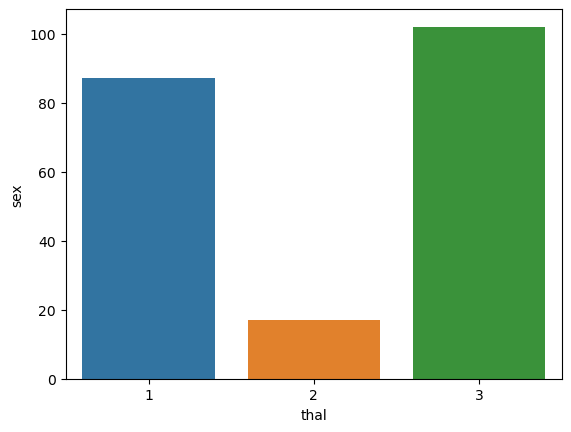

In [10]:
thal_cases = df.groupby('thal')['sex'].sum().reset_index()
sns.barplot(x='thal', y='sex', data=thal_cases)
plt.show()

In [11]:
filter_male = (df['sex']==1)
filtered_df_2 = df[filter_male]
filtered_df_2[['cp','thal']]

,cp,thal
0,0,2
1,3,1
2,3,3
3,2,1
5,1,1
...,...,...
296,3,2
298,0,3
299,3,3
300,3,3


Text(0.5, 1.0, 'Chest Pain Types')

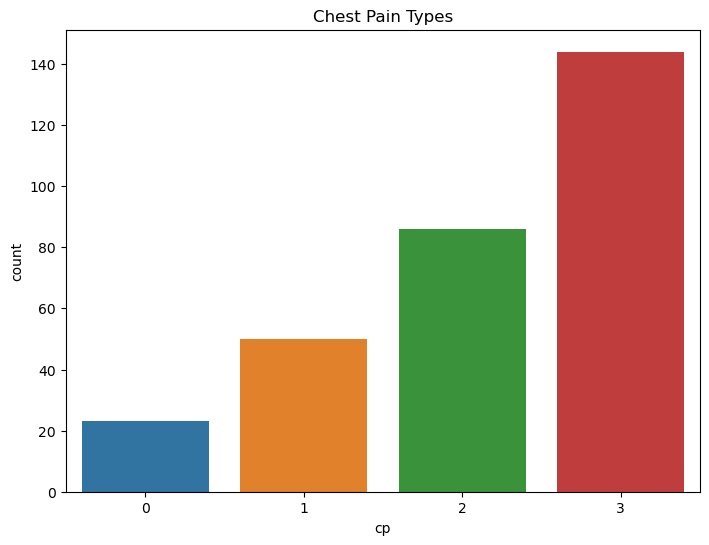

In [12]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='cp', data=df)
plt.title('Chest Pain Types') #

Text(0.5, 1.0, 'Thal types')

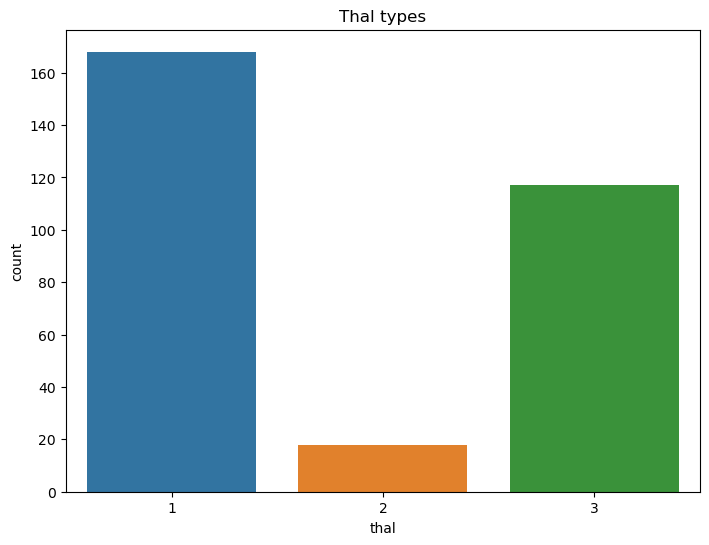

In [13]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='thal', data=df)
plt.title('Thal types')

Text(0.5, 1.0, '# of Blood Vessels')

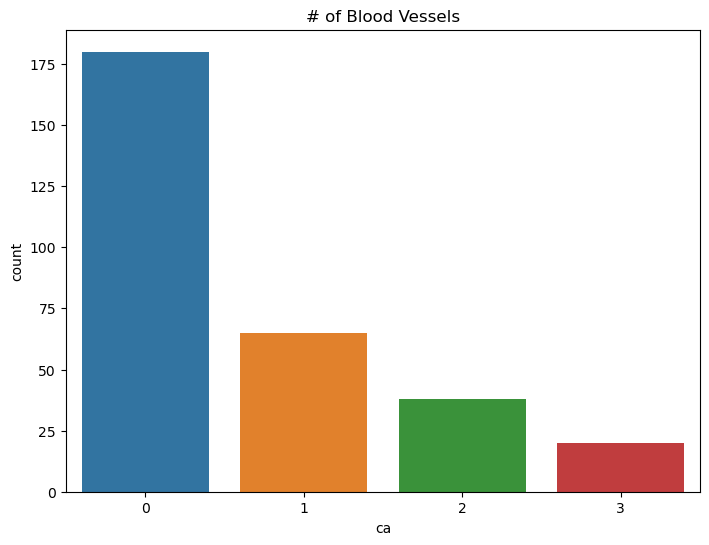

In [14]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='ca', data=df)
plt.title('# of Blood Vessels') # up sloping most common

<Axes: xlabel='sex', ylabel='count'>

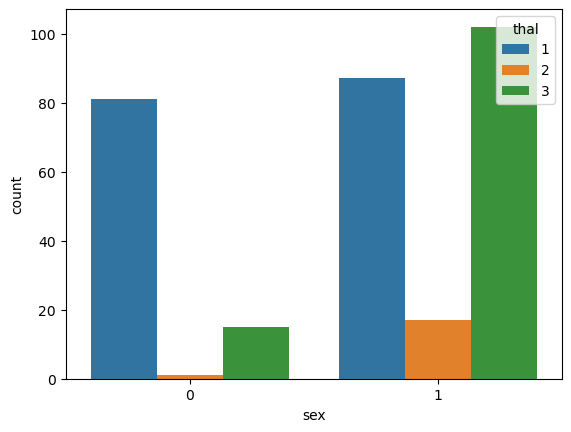

In [15]:
sns.countplot(data=df, x='sex', hue='thal') # 

<Axes: xlabel='sex', ylabel='count'>

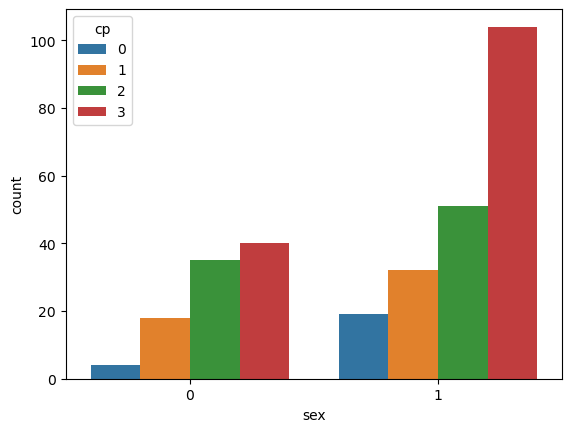

In [16]:
sns.countplot(data=df, x='sex', hue='cp') # The increase is similar in both genders
#but males have a sharper spike in asymptomatic pain (3)

Text(0.5, 1.0, 'Sex (0 = Female , 1 = Male)')

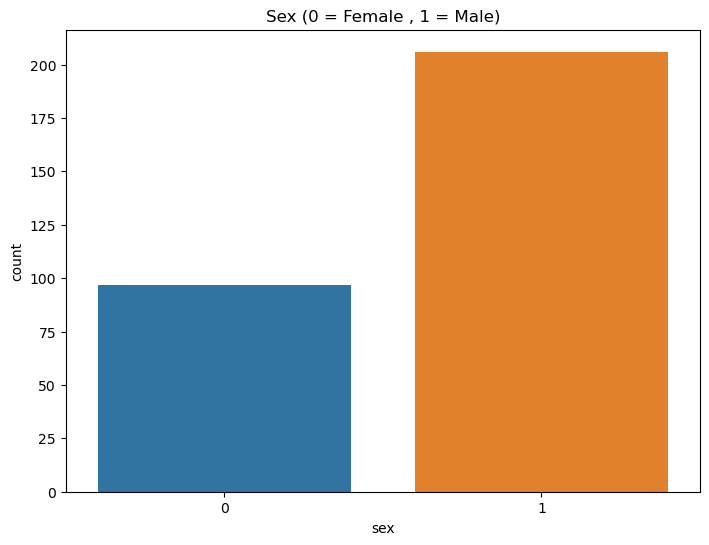

In [17]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='sex', data=df)
plt.title('Sex (0 = Female , 1 = Male)') #double the amount of males with chestpain

<Axes: xlabel='sex', ylabel='count'>

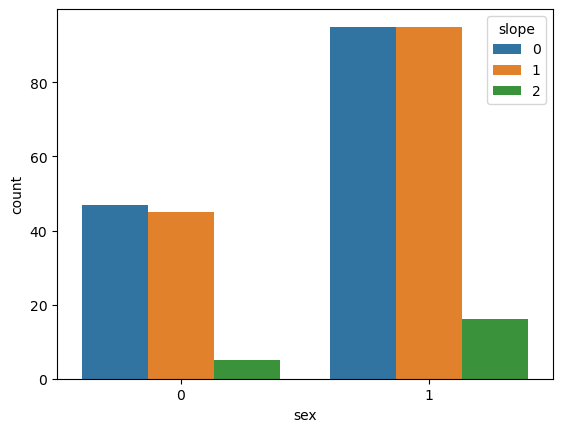

In [18]:
sns.countplot(data=df, x='sex', hue='slope') # down sloping (2) least common in both genders
# up sloping (0) and flat(1) about the same in both genders

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

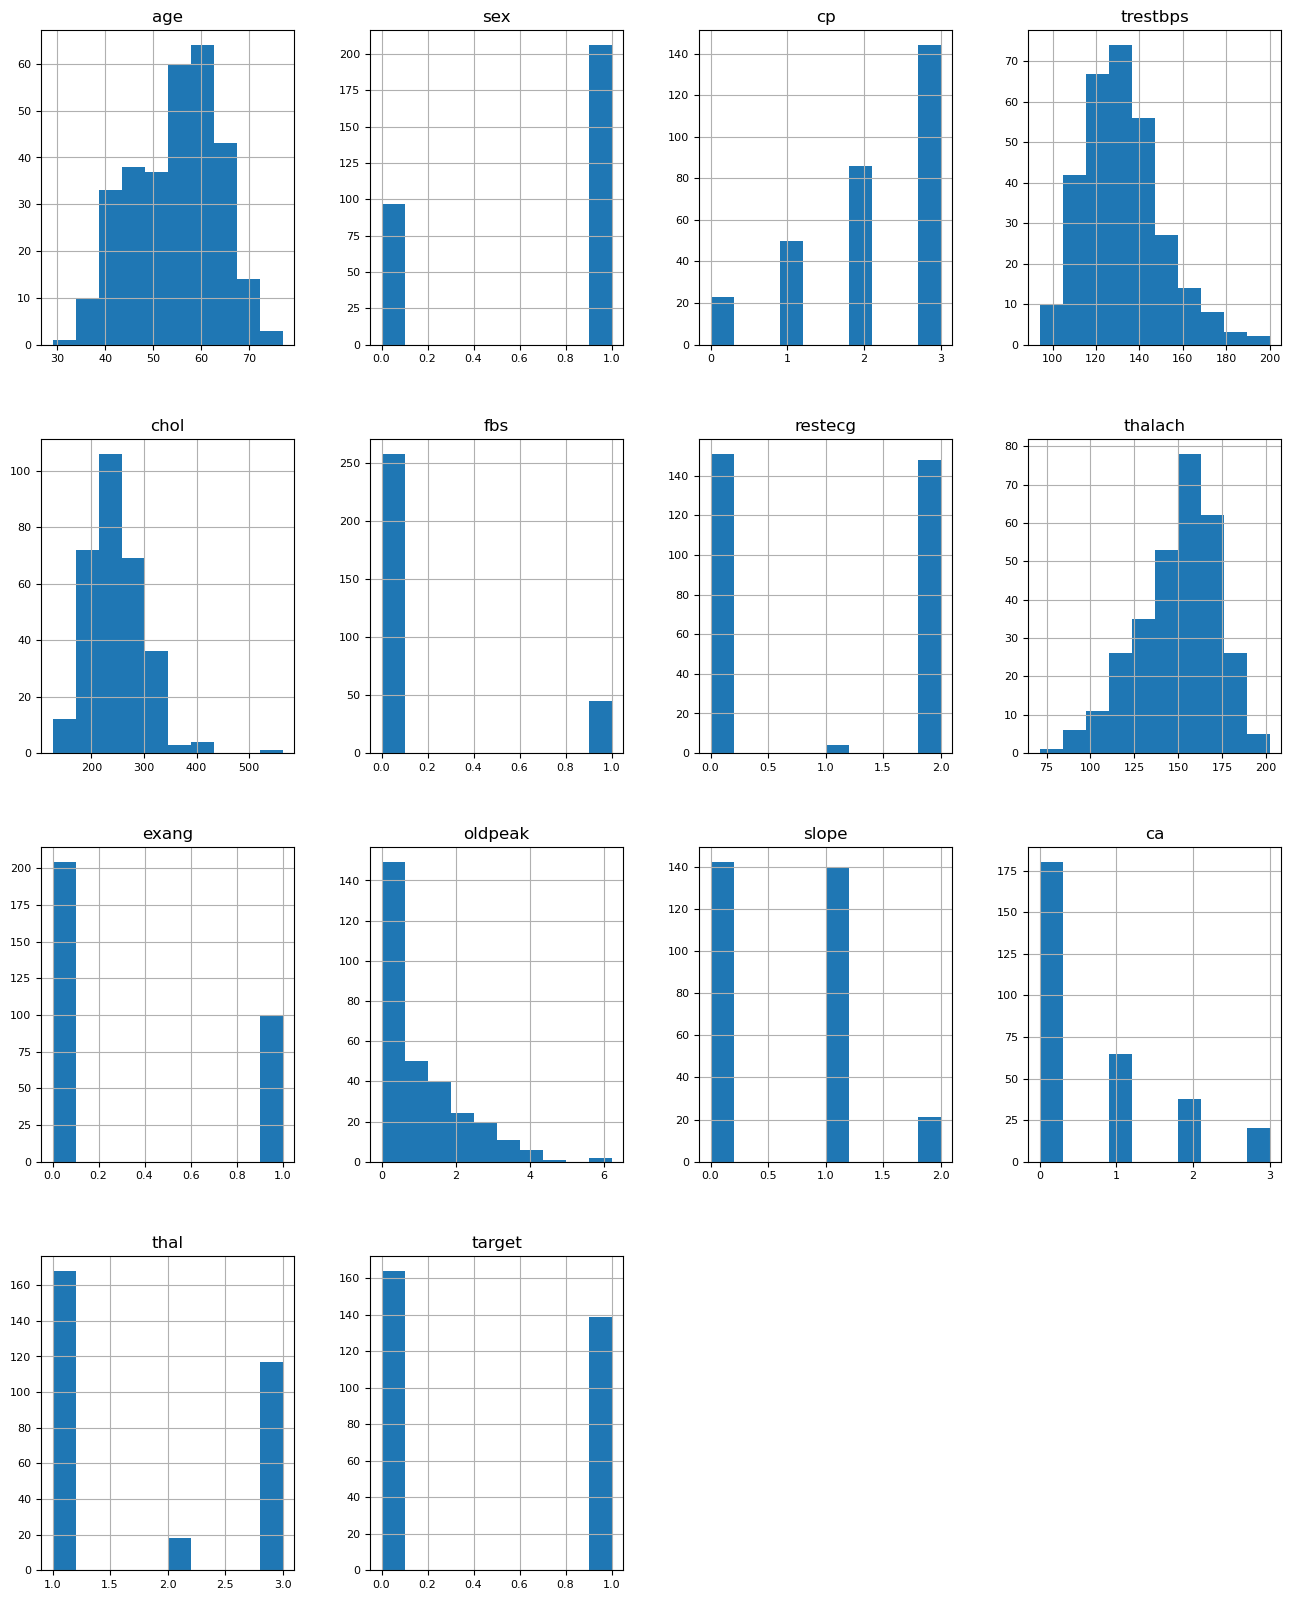

In [20]:
df.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)


In [26]:
df['age'].mean() # average age

54.43894389438944

In [25]:
df['trestbps'].mean() # average blood pressure level 

131.68976897689768

In [27]:
df['thalach'].mean() # average maximum heartrate achieved

149.6072607260726

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '29'),
  Text(1, 0, '34'),
  Text(2, 0, '35'),
  Text(3, 0, '37'),
  Text(4, 0, '38'),
  Text(5, 0, '39'),
  Text(6, 0, '40'),
  Text(7, 0, '41'),
  Text(8, 0, '42'),
  Text(9, 0, '43'),
  Text(10, 0, '44'),
  Text(11, 0, '45'),
  Text(12, 0, '46'),
  Text(13, 0, '47'),
  Text(14, 0, '48'),
  Text(15, 0, '49'),
  Text(16, 0, '50'),
  Text(17, 0, '51'),
  Text(18, 0, '52'),
  Text(19, 0, '53'),
  Text(20, 0, '54'),
  Text(21, 0, '55'),
  Text(22, 0, '56'),
  Text(23, 0, '57'),
  Text(24, 0, '58'),
  Text(25, 0, '59'),
  Text(26, 0, '60'),
  Text(27, 0, '61'),
  Text(28, 0, '62'),
  Text(29, 0, '63'),
  Text(30, 0, '64'),
  Text(31, 0, '65'),
  Text(32, 0, '66'),
  Text(33, 0, '67'),
  Text(34, 0, '68'),
  Text(35, 0, '69'),
  Text(36, 0, '70'),
  Text(37, 0, '71'),
  Text(38, 0, '74'),
 

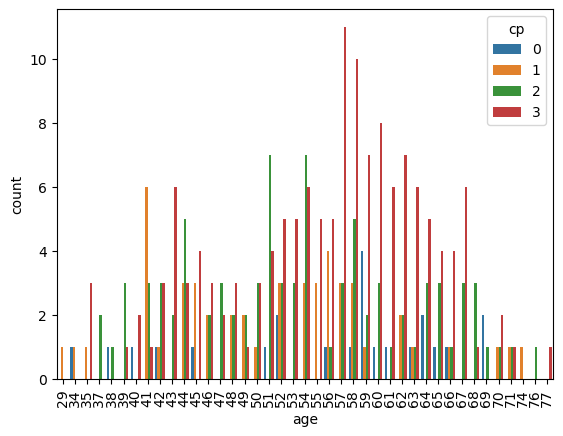

In [31]:
sns.countplot(data=df, x='age', hue='cp')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Thal to Heart Disease (0 = Normal, 1 = Diseased)')

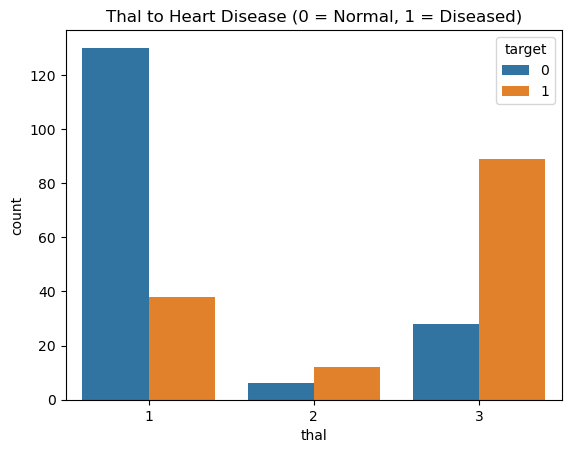

In [34]:
sns.countplot(data=df, x='thal', hue='target')
plt.title('Thal to Heart Disease (0 = Normal, 1 = Diseased)') 
# Those with normal blood flow are more likely to not have a heart disease 

Text(0.5, 1.0, 'Angina due to Exercise to Disease (0 = Normal, 1 = Diseased)')

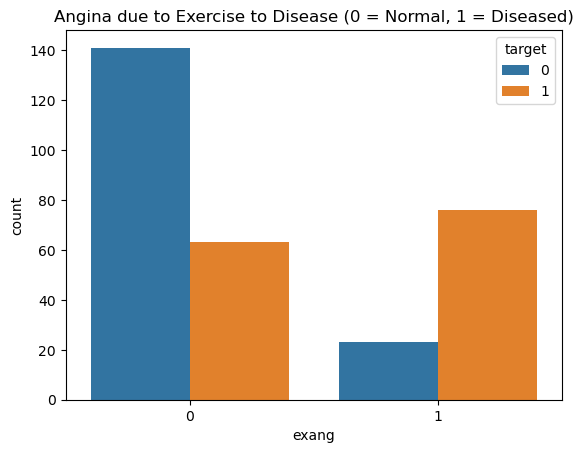

In [38]:
sns.countplot(data=df, x='exang', hue='target')
plt.title('Angina due to Exercise to Disease (0 = Normal, 1 = Diseased)') 
# 0 = No, 1 = Yes
# Those who have angina NOT due to exercise are more likely to not have a heart disease
# Those who DO have angina due to exercise are more likely to have a heart disease, but there are less who do 

Text(0.5, 1.0, '# of Major Blood Vessels to Disease (0 = Normal, 1 = Diseased)')

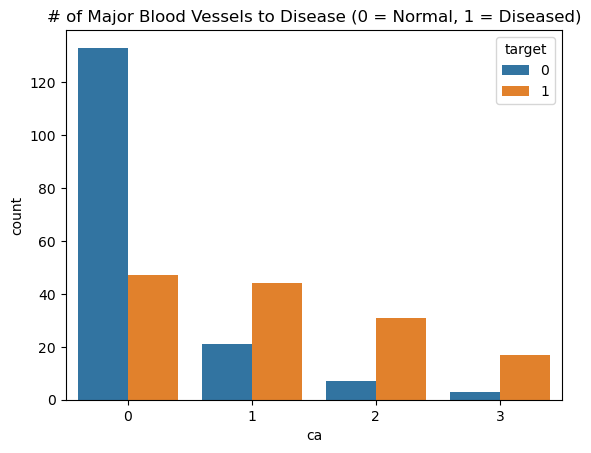

In [40]:
sns.countplot(data=df, x='ca', hue='target')
plt.title('# of Major Blood Vessels to Disease (0 = Normal, 1 = Diseased)') 
# Those who have 0 major blood vessels are more likely to not have a heart disease
# but as the vessels increase, there are more diseased than not

Text(0.5, 1.0, 'Blood Sugar > 120 mg/dl to Disease (0 = Normal, 1 = Diseased)')

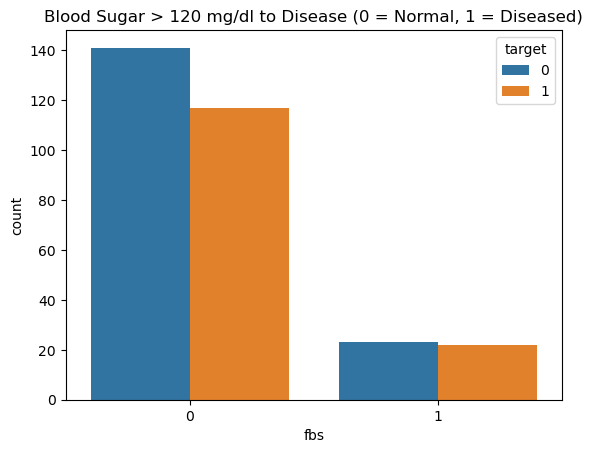

In [44]:
sns.countplot(data=df, x='fbs', hue='target')
plt.title('Blood Sugar > 120 mg/dl to Disease (0 = Normal, 1 = Diseased)') 
# 0 = False, 1 = True
# No strong correlation between blood sugar and heart disease, but there is more people with higher blood sugars

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '29'),
  Text(1, 0, '34'),
  Text(2, 0, '35'),
  Text(3, 0, '37'),
  Text(4, 0, '38'),
  Text(5, 0, '39'),
  Text(6, 0, '40'),
  Text(7, 0, '41'),
  Text(8, 0, '42'),
  Text(9, 0, '43'),
  Text(10, 0, '44'),
  Text(11, 0, '45'),
  Text(12, 0, '46'),
  Text(13, 0, '47'),
  Text(14, 0, '48'),
  Text(15, 0, '49'),
  Text(16, 0, '50'),
  Text(17, 0, '51'),
  Text(18, 0, '52'),
  Text(19, 0, '53'),
  Text(20, 0, '54'),
  Text(21, 0, '55'),
  Text(22, 0, '56'),
  Text(23, 0, '57'),
  Text(24, 0, '58'),
  Text(25, 0, '59'),
  Text(26, 0, '60'),
  Text(27, 0, '61'),
  Text(28, 0, '62'),
  Text(29, 0, '63'),
  Text(30, 0, '64'),
  Text(31, 0, '65'),
  Text(32, 0, '66'),
  Text(33, 0, '67'),
  Text(34, 0, '68'),
  Text(35, 0, '69'),
  Text(36, 0, '70'),
  Text(37, 0, '71'),
  Text(38, 0, '74'),
 

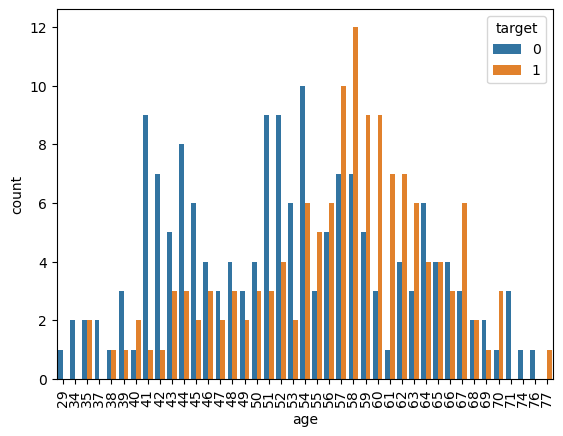

In [43]:
sns.countplot(data=df, x='age', hue='target')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, '94'),
  Text(1, 0, '100'),
  Text(2, 0, '101'),
  Text(3, 0, '102'),
  Text(4, 0, '104'),
  Text(5, 0, '105'),
  Text(6, 0, '106'),
  Text(7, 0, '108'),
  Text(8, 0, '110'),
  Text(9, 0, '112'),
  Text(10, 0, '114'),
  Text(11, 0, '115'),
  Text(12, 0, '117'),
  Text(13, 0, '118'),
  Text(14, 0, '120'),
  Text(15, 0, '122'),
  Text(16, 0, '123'),
  Text(17, 0, '124'),
  Text(18, 0, '125'),
  Text(19, 0, '126'),
  Text(20, 0, '128'),
  Text(21, 0, '129'),
  Text(22, 0, '130'),
  Text(23, 0, '132'),
  Text(24, 0, '134'),
  Text(25, 0, '135'),
  Text(26, 0, '136'),
  Text(27, 0, '138'),
  Text(28, 0, '140'),
  Text(29, 0, '142'),
  Text(30, 0, '144'),
  Text(31, 0, '145'),
  Text(32, 0, '146'),
  Text(33, 0, '148'),
  Text(34, 0, '150'),
  Text(35, 0, '

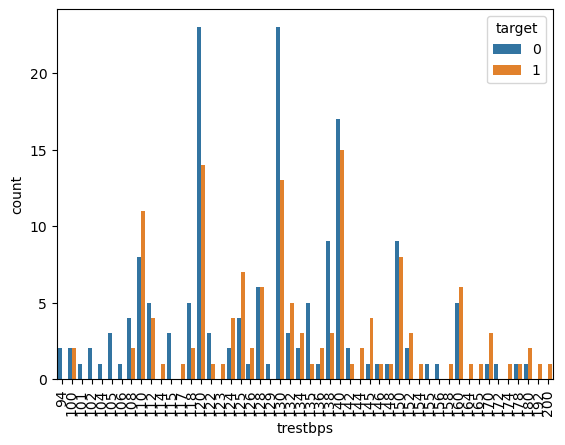

In [46]:
sns.countplot(data=df, x='trestbps', hue='target')
plt.xticks(rotation=90)

In [47]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.122300,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.367911,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.259835,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.126879,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.030438,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.054164,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.019115,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.257980,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.321680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.333925,0.424510
